# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Load data (prepared previously)


In [3]:
df = pd.read_csv("../data/ai_job_dataset_encoded.csv")
X = df.drop("salary_usd", axis=1)
y = df["salary_usd"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Evaluate models on training vs test set


In [ ]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    return results

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = pd.DataFrame({name: evaluate_model(m) for name, m in models.items()}).T
results = results.round(3)
print(results)

                   Train R2  Test R2   Test MAE  Test RMSE
Linear Regression     1.000    0.852  17018.115  23197.018
Ridge                 0.963    0.852  17003.962  23199.597
Lasso                 0.975    0.844  16374.023  23883.599
Decision Tree         1.000    0.767  19762.566  29166.212
Random Forest         0.981    0.863  15845.296  22335.390


# 2. Residual plots


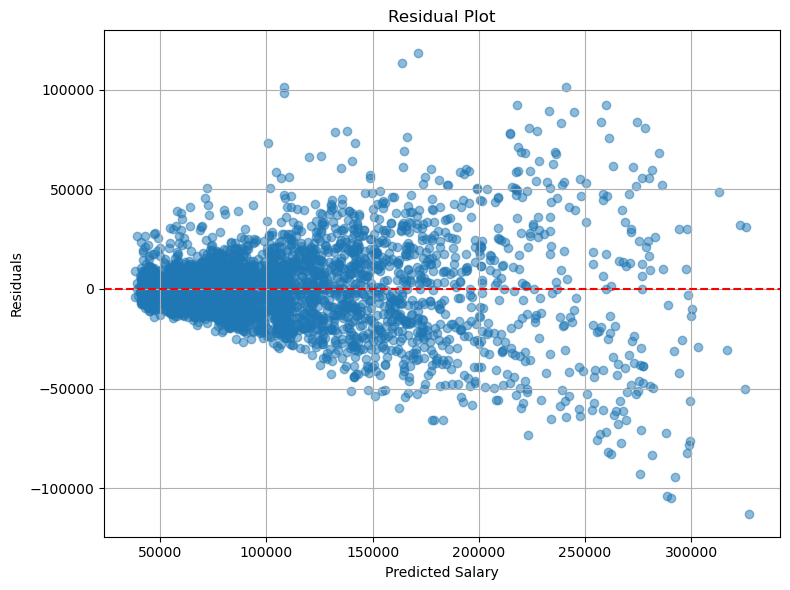

In [5]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature importance (for RandomForest)


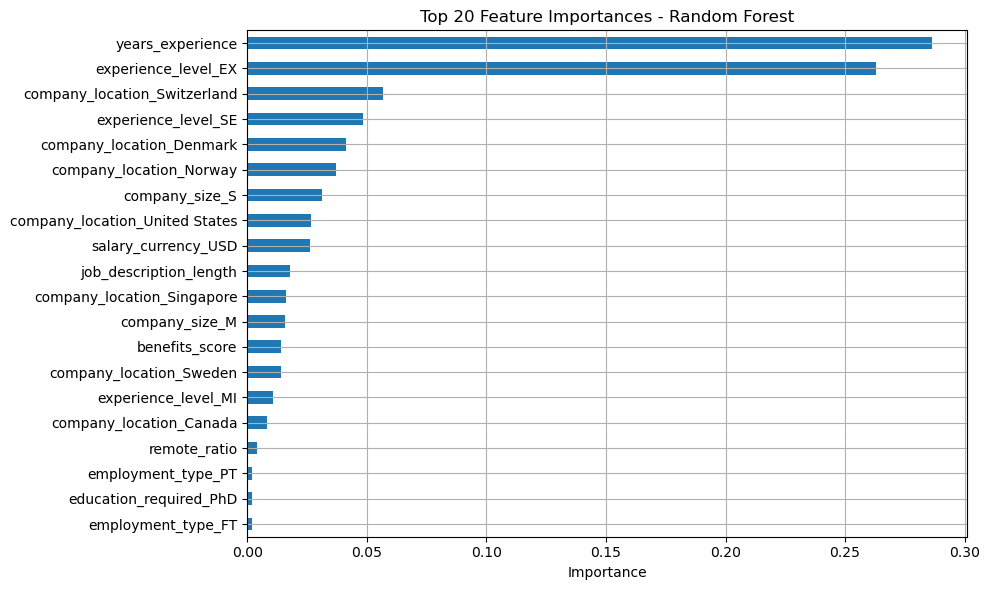

In [6]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
importances.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Overfitting check


In [11]:
print("\n\nOverfitting Check:")
overfitting_check = results[["Train R2", "Test R2"]]
overfitting_check.loc[:,"Difference"] = (overfitting_check["Train R2"] - overfitting_check["Test R2"]).round(3)
print(overfitting_check.sort_values("Difference", ascending=False))



Overfitting Check:
                   Train R2  Test R2  Difference
Decision Tree         1.000    0.767       0.233
Linear Regression     1.000    0.852       0.148
Lasso                 0.975    0.844       0.131
Random Forest         0.981    0.863       0.118
Ridge                 0.963    0.852       0.111


/var/folders/04/hz4r2trn1t770zgl0x0kl71m0000gn/T/ipykernel_50105/3819324901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overfitting_check.loc[:,"Difference"] = (overfitting_check["Train R2"] - overfitting_check["Test R2"]).round(3)


**Note**: The `SettingWithCopyWarning` shown above does not affect the correctness of the results. It is a common Pandas warning when assigning to a DataFrame slice. 
Since the computed values are correctly assigned and displayed, no further action is required.